In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings

In [2]:
df = pd.read_csv('data/pyrolysis.csv')

In [3]:
df.head()

,Index,Biomass species,M,Ash,VM,FC,C,H,O,N,PS,FT,HR,FR,Solid phase,Liquid phase,Gas phase
0,1,Jerusalem artichoke stick,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,0.5,550,10.0,100.0,35,44.9,20.1
1,2,Jerusalem artichoke stick,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,0.5,650,10.0,100.0,31.75,41.25,27
2,3,Jerusalem artichoke stick,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,0.5,750,10.0,100.0,30.2,40.6,29.2
3,4,Jerusalem artichoke stick,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,0.5,850,10.0,100.0,28.6,36.36,35.04
4,5,reed,5.89,8.47,72.12,13.52,42.78,5.17,50.51,1.33,0.5,550,10.0,100.0,32.85,54.38,12.77


In [4]:
df["PS"] = pd.to_numeric(df["PS"], errors="coerce")

In [5]:
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns
num_features = df.select_dtypes(exclude="object").columns
cat_features = df.select_dtypes(include="object").columns

# Create Imputers
num_imputer = SimpleImputer(strategy="median")  # Median for numerical
cat_imputer = SimpleImputer(strategy="most_frequent")  # Most frequent for categorical

# Apply Imputers
df[num_features] = num_imputer.fit_transform(df[num_features])  # Transform numerical columns
df[cat_features] = cat_imputer.fit_transform(df[cat_features])  # Transform categorical columns

# Print to check if nulls are removed
print("Missing values after imputation:\n", df.isna().sum())


Missing values after imputation:
 Index              0
Biomass species    0
M                  0
Ash                0
VM                 0
FC                 0
C                  0
H                  0
O                  0
N                  0
PS                 0
FT                 0
HR                 0
FR                 0
Solid phase        0
Liquid phase       0
Gas phase          0
dtype: int64


In [6]:
X = df.drop(columns=['Solid phase','Liquid phase', 'Gas phase','Index'],axis=1) 

In [7]:
X.head()

,Biomass species,M,Ash,VM,FC,C,H,O,N,PS,FT,HR,FR
0,Jerusalem artichoke stick,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,0.5,550.0,10.0,100.0
1,Jerusalem artichoke stick,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,0.5,650.0,10.0,100.0
2,Jerusalem artichoke stick,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,0.5,750.0,10.0,100.0
3,Jerusalem artichoke stick,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,0.5,850.0,10.0,100.0
4,reed,5.89,8.47,72.12,13.52,42.78,5.17,50.51,1.33,0.5,550.0,10.0,100.0


In [29]:
X.isna().sum()

Biomass species    0
M                  0
Ash                0
VM                 0
FC                 0
C                  0
H                  0
O                  0
N                  0
PS                 0
FT                 0
HR                 0
FR                 0
dtype: int64

In [8]:
y = df['Liquid phase'] #bio fuel

In [9]:
y

0       44.9
1      41.25
2       40.6
3      36.36
4      54.38
       ...  
746    50.23
747    53.15
748    55.32
749    51.85
750    50.51
Name: Liquid phase, Length: 751, dtype: object

In [10]:
X.dtypes

Biomass species     object
M                  float64
Ash                float64
VM                 float64
FC                 float64
C                  float64
H                  float64
O                  float64
N                  float64
PS                 float64
FT                 float64
HR                 float64
FR                 float64
dtype: object

In [11]:
X.select_dtypes(include="object").columns

Index(['Biomass species'], dtype='object')

In [12]:
# #Pipeline:
# # Create Column Transformer with 3 types of transformers
# num_features = X.select_dtypes(exclude="object").columns ##all my numerical features
# cat_features = X.select_dtypes(include="object").columns

# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer

# numeric_transformer = StandardScaler()
# oh_transformer = OneHotEncoder()

# preprocessor = ColumnTransformer(
#     [
#         ("OneHotEncoder", oh_transformer, cat_features), #OneHotEncoder for cat features
#          ("StandardScaler", numeric_transformer, num_features),   #StandardScaler for cat features     
#     ]
# )

In [13]:
# X = preprocessor.fit_transform(X)

In [14]:
# X.shape

In [15]:
# from sklearn.decomposition import PCA

# # Apply PCA to reduce dimensions while keeping 95% of variance
# pca = PCA(n_components=0.95)  # Keeps enough components to explain 95% variance


In [16]:
# X.shape

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd

# Load dataset
# X = pd.read_csv("pyrolysis.csv")  # Update path

# Identify numerical & categorical features
num_features = X.select_dtypes(exclude="object").columns.tolist()
cat_features = X.select_dtypes(include="object").columns.tolist()

# **Numerical Pipeline**
num_pipeline = Pipeline([
    # ("imputer", SimpleImputer(strategy="median")),  # Fill missing values
    ("scaler", StandardScaler())  # Standardize numerical data
])

# **Categorical Pipeline (OHE → PCA)**
cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False)),# One-hot encode categorical data with dense output
    ("pca", PCA(n_components=5))  # Reduce to 5 principal components
])

# **Combine Pipelines**
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),  # Apply num_pipeline to numerical features
    ("cat", cat_pipeline, cat_features)   # Apply cat_pipeline to categorical features
])

# **Transform Data**
X_transformed = preprocessor.fit_transform(X)

# **Check Transformed Shape**
print("Transformed Data Shape:", X_transformed.shape)


Transformed Data Shape: (751, 17)


In [33]:
X_transformed.shape

(751, 17)

In [38]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((600, 17), (151, 17))

In [43]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 751 entries, 0 to 750
Series name: Liquid phase
Non-Null Count  Dtype 
--------------  ----- 
751 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [ ]:
# Convert y_train and y_test to float
y_train = pd.to_numeric(y_train, errors="coerce")
y_test = pd.to_numeric(y_test, errors="coerce")

# Check if there are any NaN values after conversion
print(y_train.isna().sum(), "missing values in y_train")
print(y_test.isna().sum(), "missing values in y_test") 

#there might be some null values after conversion to numeric

3 missing values in y_train
0 missing values in y_test


In [46]:
# Drop or fill NaNs if needed
y_train = y_train.fillna(y_train.median())  # Replace NaNs with median
# y_test = y_test.fillna(y_test.median())  # Replace NaNs with median
print(y_train.isna().sum(), "missing values in y_train")
print(y_test.isna().sum(), "missing values in y_test") 

0 missing values in y_train
0 missing values in y_test


In [47]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [52]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 10.0490
- Mean Absolute Error: 7.7030
- R2 Score: 0.2963
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.8309
- Mean Absolute Error: 7.2688
- R2 Score: 0.3074


Lasso
Model performance for Training set
- Root Mean Squared Error: 10.5165
- Mean Absolute Error: 8.3155
- R2 Score: 0.2293
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.0512
- Mean Absolute Error: 7.5954
- R2 Score: 0.2760


Ridge
Model performance for Training set
- Root Mean Squared Error: 10.0495
- Mean Absolute Error: 7.7100
- R2 Score: 0.2963
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.8308
- Mean Absolute Error: 7.2748
- R2 Score: 0.3074


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.0121
- Mean Absolute Error: 3.2065
- R2 Score: 0.8250
-------------------

In [53]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
7,CatBoosting Regressor,0.789612
6,XGBRegressor,0.779570
5,Random Forest Regressor,0.742464
4,Decision Tree,0.667646
3,K-Neighbors Regressor,0.551158
8,AdaBoost Regressor,0.521231
2,Ridge,0.307423
0,Linear Regression,0.307406
1,Lasso,0.276012


In [54]:
# Assuming you have already trained your CatBoost Regressor
catboost_model = models["CatBoosting Regressor"]  # Fetch the trained CatBoost model
y_pred = catboost_model.predict(X_test)  # Predict test set


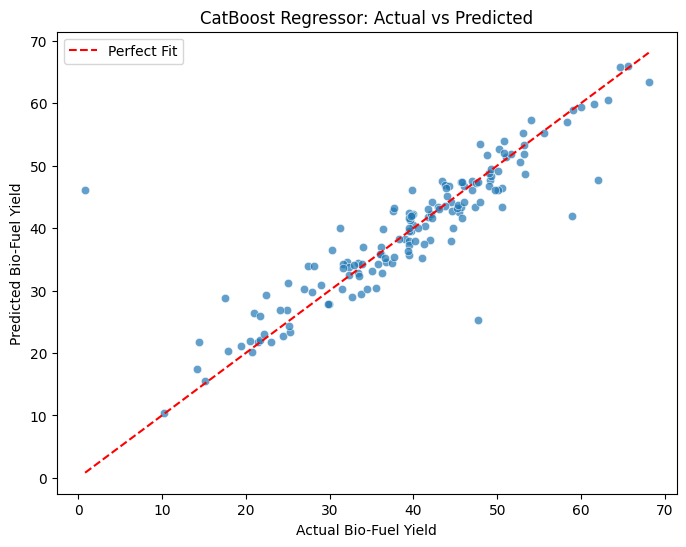

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
sns.lineplot(x=y_test, y=y_test, color="red", linestyle="--", label="Perfect Fit")

plt.xlabel("Actual Bio-Fuel Yield")
plt.ylabel("Predicted Bio-Fuel Yield")
plt.title("CatBoost Regressor: Actual vs Predicted")
plt.legend()
plt.show()


In [57]:
# Assuming CatBoost is already trained
catboost_model = models["CatBoosting Regressor"]
y_pred = catboost_model.predict(X_test)

# Calculate Errors
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")


Mean Absolute Error (MAE): 2.9338
Root Mean Squared Error (RMSE): 5.4183
R2 Score: 0.7896


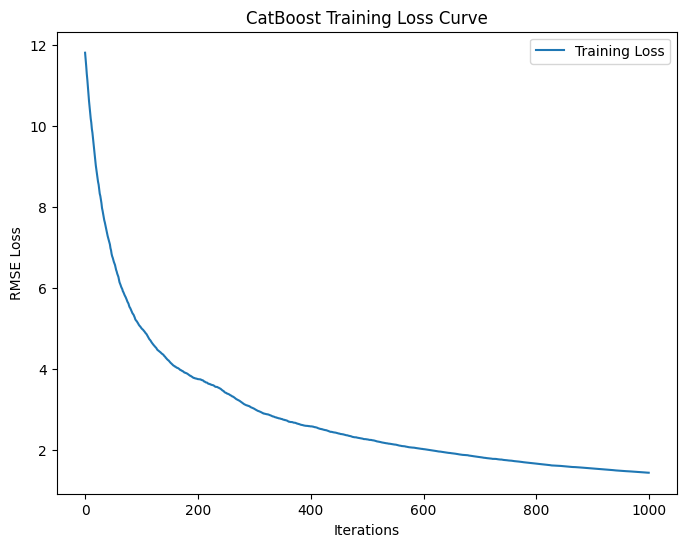

In [58]:
plt.figure(figsize=(8, 6))
plt.plot(catboost_model.get_evals_result()['learn']['RMSE'], label="Training Loss")
plt.xlabel("Iterations")
plt.ylabel("RMSE Loss")
plt.title("CatBoost Training Loss Curve")
plt.legend()
plt.show()


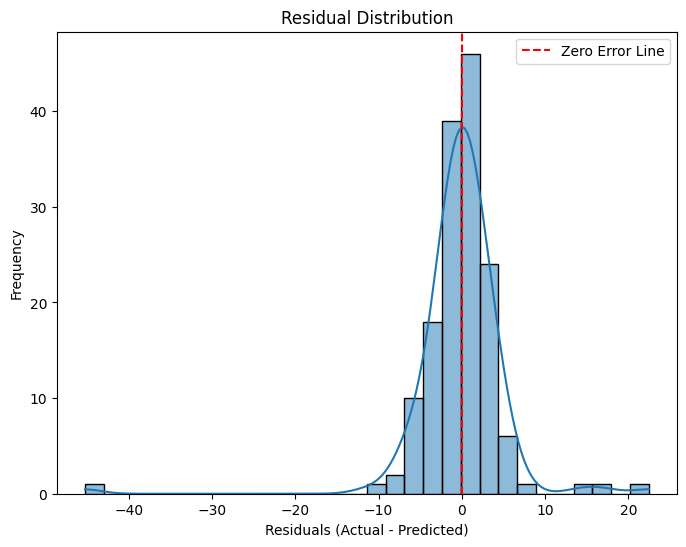

In [59]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.axvline(x=0, color='red', linestyle='--', label="Zero Error Line")
plt.legend()
plt.show()


C:\Users\VINESH\AppData\Local\Temp\ipykernel_8196\3085262219.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=feature_names, palette="viridis")


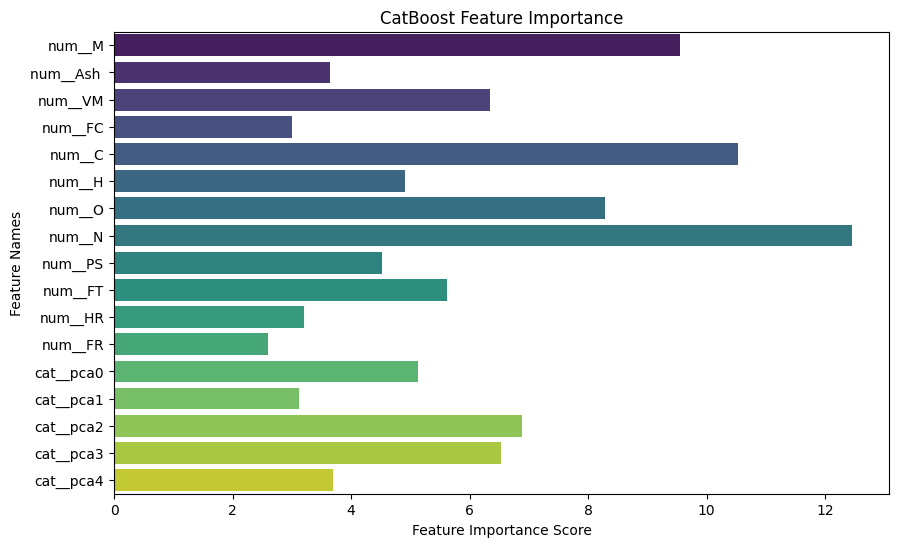

In [62]:
# Get transformed feature names
feature_names = preprocessor.get_feature_names_out()

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure feature names are a list
feature_names = list(feature_names)  

# Plot feature importance
plt.figure(figsize=(10, 6))
importance = catboost_model.get_feature_importance()

sns.barplot(x=importance, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Names")
plt.title("CatBoost Feature Importance")
plt.show()

